In [5]:
pip install imblearn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

In [7]:
dataset = pd.read_csv('/workspaces/mid-sem-hackthon-group-8/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# **Exploratory Data Analysis**

In [8]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
dataset.shape

(7043, 21)

In [10]:
#Checking if there are any null values
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#Descirbe the dataset
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
#Adding randomised sythetic data
np.random.seed(42)
updated_dataset = dataset.copy()

updated_dataset['IncomeLevel'] = np.random.choice(['Low', 'Medium', 'High'], size=len(updated_dataset))
updated_dataset['Education'] = np.random.choice(['High school', 'Bachelor', 'Masters', 'PhD'], size=len(updated_dataset))
updated_dataset['EmploymentStatus'] = np.random.choice(['Employed', 'Unemployed', 'Retired'], size=len(updated_dataset))

Churn
No     5174
Yes    1869
Name: count, dtype: int64


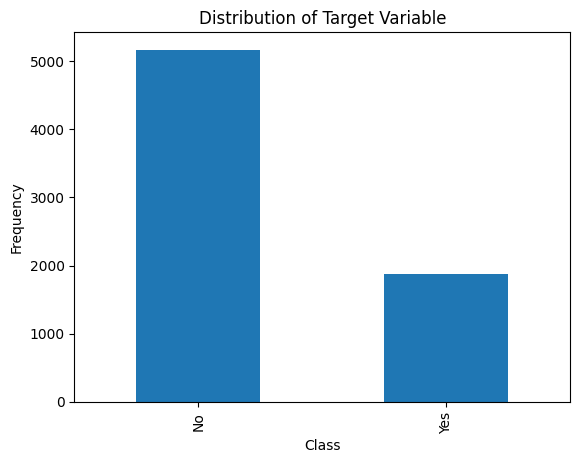

In [14]:
distribution = updated_dataset['Churn'].value_counts()
print(distribution)

#Shows how the data is balanced or unbalanced
distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

In [15]:
updated_dataset['Churn'].unique()
#Our target variable makes us know we are dealing with a binary classification

array(['No', 'Yes'], dtype=object)

In [16]:
#Dropping customerID
CID_drop_updated_dataset = updated_dataset.drop('customerID', axis=1)

In [17]:
X = CID_drop_updated_dataset.drop('Churn', axis=1)
y = CID_drop_updated_dataset['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,IncomeLevel,Education,EmploymentStatus
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,High,Bachelor,Retired
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.5,Low,High school,Employed
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,High,High school,Retired
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,High,Bachelor,Retired
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Low,High school,Employed


In [19]:
y.head(15)

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    1
14    0
Name: Churn, dtype: int64

In [20]:
y.unique()

array([0, 1])

In [21]:
# One-hot encoding categorical variables
dataset_encoded = pd.get_dummies(X, drop_first=True)

dataset_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,IncomeLevel_Low,IncomeLevel_Medium,Education_High school,Education_Masters,Education_PhD,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,True,False,True,False,False,False,False


In [22]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
X_res, y_res = sm.fit_resample(dataset_encoded, y)

X_res.shape

(10348, 6566)

In [23]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Columns: 6566 entries, SeniorCitizen to EmploymentStatus_Unemployed
dtypes: bool(6563), float64(1), int64(2)
memory usage: 65.0 MB


Churn
0    5174
1    5174
Name: count, dtype: int64


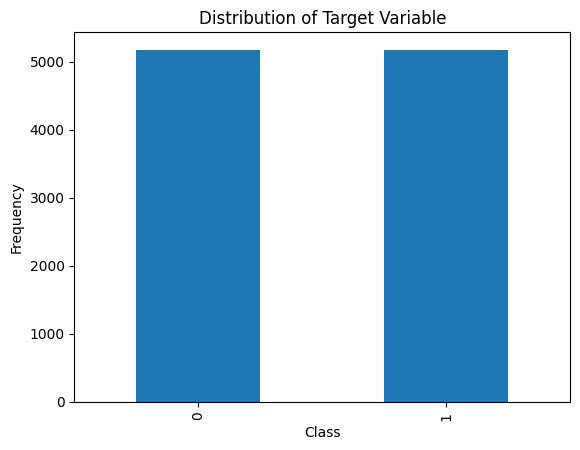

In [24]:
updated_distribution = y_res.value_counts()
print(updated_distribution)

#Shows how the data is balanced or unbalanced
updated_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [26]:
#Random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1021
           1       0.88      0.89      0.88      1049

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070

AUC-ROC: 0.9547953416760891


In [27]:
# Logistic regression
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)
lr_accuracy = accuracy_score(lr_prediction, y_test)
print("Test accuracy {:.2f}%".format(lr_accuracy*100))

Test accuracy 87.68%


In [28]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_prediction = tree.predict(X_test)
tree_accuracy = accuracy_score(tree_prediction, y_test)
print("Test accuracy {:.2f}%".format(tree_accuracy*100))

Test accuracy 84.44%
